### Problem statement we want to predict that airline customer will loyal or disloyal using ANN

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  confusion_matrix,classification_report

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})
df['Class'] = df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


In [4]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0


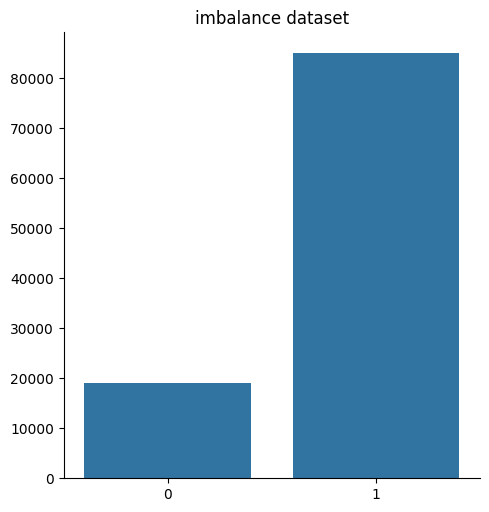

In [5]:
sns.catplot(x = list((df['Customer Type'].value_counts().keys())),y=list((df['Customer Type'].value_counts().values)),kind='bar')
plt.title('imbalance dataset')
plt.show()

In [6]:
loyal_customer = df[df['Customer Type']==1].loc[0:20000]
disloyal_customer = df[df['Customer Type']==0]

In [7]:
balance_df = pd.concat([loyal_customer,disloyal_customer])

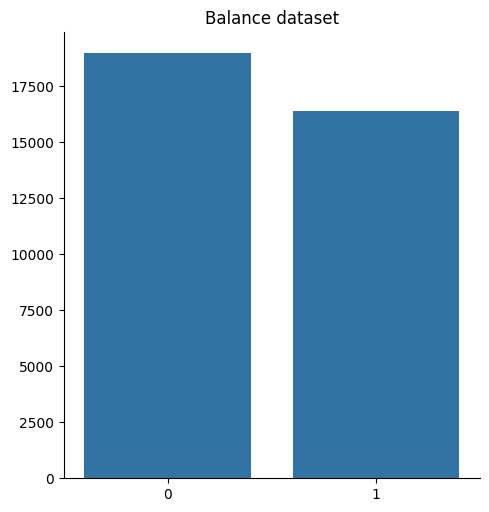

In [8]:
sns.catplot(x = list((balance_df['Customer Type'].value_counts().keys())),y=list((balance_df['Customer Type'].value_counts().values)),kind='bar')
plt.title('Balance dataset')
plt.show()

In [9]:
balance_df.isnull().sum()

Gender                         0
Customer Type                  0
Type of Travel                 0
Class                          0
satisfaction                   0
Age                            0
Flight Distance                0
Inflight entertainment         0
Baggage handling               0
Cleanliness                    0
Departure Delay in Minutes     0
Arrival Delay in Minutes      94
dtype: int64

In [10]:
null_df = balance_df[balance_df.isnull()['Arrival Delay in Minutes']]
null_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,0,1,1,2,1,38,109,5,4,5,31,NaN
1124,1,1,0,2,0,53,1012,4,4,4,38,NaN
1529,1,1,1,1,0,39,733,2,2,3,11,NaN
2108,0,1,0,2,0,24,417,5,2,5,1,NaN
2485,0,1,0,2,1,28,2370,3,4,3,3,NaN


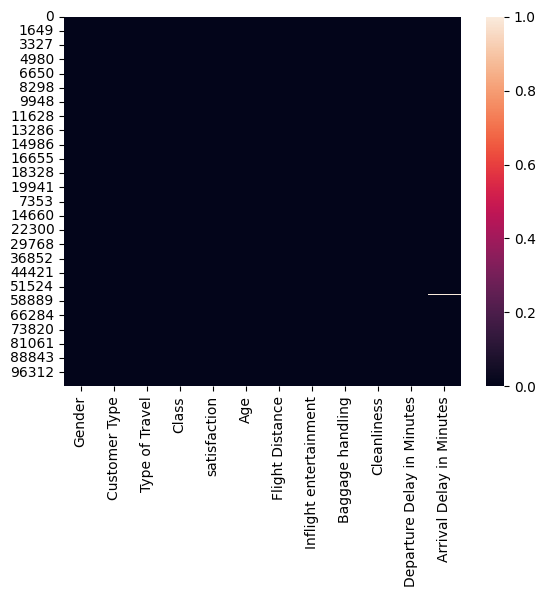

In [11]:
sns.heatmap(balance_df.isnull())
plt.show()
# to visualaize the represenatation of missing value

In [12]:
balance_df.dropna().isnull().sum()
## null free data

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [13]:
null_free_df = balance_df.dropna()

In [14]:
x = null_free_df.drop('Customer Type',axis=1)
y = null_free_df[['Customer Type']]

In [15]:
x.shape ,y.shape

((35269, 11), (35269, 1))

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Standard Scaling the Dataset

In [17]:
from sklearn.preprocessing import  StandardScaler
st_scaler = StandardScaler()

In [18]:
x_train_scaled = st_scaler.fit_transform(x_train)
x_test_scaled  = st_scaler.transform(x_test)

## We are importing all the necessary library for build ANN

In [19]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import  Sequential

In [20]:
x_train_scaled.shape,    y_train.shape   # shape of the Dataset

((28215, 11), (28215, 1))

In [21]:
### Defining ANN Model

Ann_Model = Sequential()
# Hidden layers
Ann_Model.add(Dense(units=68,activation='relu',input_dim=x_train_scaled.shape[1]))
Ann_Model.add(Dense(units=32,activation='relu'))
Ann_Model.add(Dense(units=24,activation='relu'))
Ann_Model.add(Dense(units=12,activation='relu'))
#output layers
Ann_Model.add(Dense(units=1,activation='sigmoid'))

#compiling the models
Ann_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Ann_Model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                816       
                                                                 
 dense_1 (Dense)             (None, 32)                2208      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 4129 (16.13 KB)
Trainable params: 4129 (16.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history = Ann_Model.fit(x_train_scaled,y_train,epochs=15,validation_data=(x_test_scaled,y_test))

Epoch 1/15


882/882 [==============================] - 6s 4ms/step - loss: 0.2796 - accuracy: 0.8895 - val_loss: 0.2432 - val_accuracy: 0.9056
Epoch 2/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2310 - accuracy: 0.9119 - val_loss: 0.2303 - val_accuracy: 0.9110
Epoch 3/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2198 - accuracy: 0.9159 - val_loss: 0.2211 - val_accuracy: 0.9166
Epoch 4/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2117 - accuracy: 0.9184 - val_loss: 0.2180 - val_accuracy: 0.9196
Epoch 5/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2050 - accuracy: 0.9226 - val_loss: 0.2160 - val_accuracy: 0.9195
Epoch 6/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2007 - accuracy: 0.9243 - val_loss: 0.2166 - val_accuracy: 0.9185
Epoch 7/15
882/882 [==============================] - 3s 4ms/step - loss: 0.1975 - accuracy: 0.9248 - val_loss: 0.2094 - val_accuracy: 0.9208
Epoc

In [27]:
history = Ann_Model.fit(x_train_scaled,y_train, initial_epoch=15,epochs=50,validation_data=(x_test_scaled,y_test))


Epoch 16/50
882/882 [==============================] - 4s 4ms/step - loss: 0.1826 - accuracy: 0.9321 - val_loss: 0.2073 - val_accuracy: 0.9212
Epoch 17/50
882/882 [==============================] - 3s 3ms/step - loss: 0.1807 - accuracy: 0.9311 - val_loss: 0.2082 - val_accuracy: 0.9230
Epoch 18/50
882/882 [==============================] - 3s 4ms/step - loss: 0.1803 - accuracy: 0.9326 - val_loss: 0.2039 - val_accuracy: 0.9229
Epoch 19/50
882/882 [==============================] - 3s 4ms/step - loss: 0.1791 - accuracy: 0.9321 - val_loss: 0.2045 - val_accuracy: 0.9212
Epoch 20/50
882/882 [==============================] - 3s 4ms/step - loss: 0.1782 - accuracy: 0.9322 - val_loss: 0.2035 - val_accuracy: 0.9225
Epoch 21/50
882/882 [==============================] - 3s 4ms/step - loss: 0.1776 - accuracy: 0.9330 - val_loss: 0.2056 - val_accuracy: 0.9237
Epoch 22/50
882/882 [==============================] - 3s 3ms/step - loss: 0.1765 - accuracy: 0.9335 - val_loss: 0.2066 - val_accuracy: 0.9213

In [28]:
training_details = pd.DataFrame(history.history)
training_details

,loss,accuracy,val_loss,val_accuracy
0,0.182573,0.932057,0.207257,0.921179
1,0.180703,0.931136,0.208186,0.923022
2,0.180349,0.932554,0.203880,0.922881
3,0.179149,0.932093,0.204472,0.921179
4,0.178193,0.932199,0.203486,0.922455
5,0.177554,0.933050,0.205632,0.923731
6,0.176489,0.933475,0.206572,0.921321
7,0.175635,0.934184,0.204264,0.922314
8,0.174847,0.933546,0.209026,0.920329
9,0.173852,0.934645,0.213539,0.918344


<Axes: >

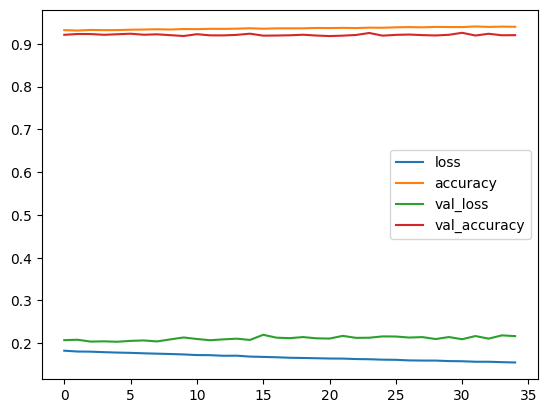

In [29]:
training_details.plot()
# all are plotted

<Axes: >

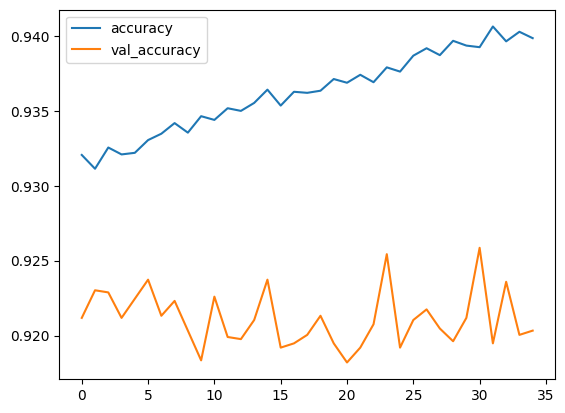

In [31]:
training_details[['accuracy','val_accuracy']].plot()
# Training Accuracy Vs Validation Accuracy

In [32]:
y_pred = Ann_Model.predict(x_test_scaled)

221/221 [==============================] - 1s 3ms/step


In [41]:
# y_pred[y_pred>0.5] 
def ge(y_p):  
    for y in y_p:
        if y >0.5:
            return 1
        else:
            return 0

In [50]:
predictions = (y_pred>0.5).astype(int).ravel()

In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
confusion_matrix(predictions,y_test)
# confusion metrix

array([[3549,  354],
       [ 208, 2943]], dtype=int64)

In [57]:
print(classification_report(predictions,y_test))
#classification report of our model

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3903
           1       0.89      0.93      0.91      3151

    accuracy                           0.92      7054
   macro avg       0.92      0.92      0.92      7054
weighted avg       0.92      0.92      0.92      7054



In [58]:
Ann_Model.save('custom_satisfaction.h5')
# To save the model afer training

c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
from tensorflow.keras.models import load_model
# To load the model

In [60]:
model_loaded = load_model('custom_satisfaction.h5')

In [62]:
prediction_after_loading = model_loaded.predict(x_test_scaled)

221/221 [==============================] - 1s 2ms/step


## EarlyStoping , Dropout and HyperparameterTurning

In [ ]:
## code will be uploaded soon

Thank you